Импортируем необходимые библиотеки

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import math
import networkx as nx

Загрузим данные, посмотрим на их характеристики

In [4]:
df = pd.read_excel('CustomerChurnDataSet.xlsx')

In [5]:
sizeData = df.shape
print("Размер датасета: ", sizeData)

Размер датасета:  (669, 5)


In [6]:
df.head()

,Source,References,Mark_Refernce,Mark_Source,Rank
0,Profiling Television Watching Behaviour Using ...,process modeling and analysis in process minin...,r1,s1,NaN
1,0,business process analytics and big data system...,r2,s1,NaN
2,0,research trends in customer churn prediction a...,r3,s1,NaN
3,0,a new hybrid classification algorithm for cust...,r4,s1,NaN
4,0,dynamic behavior based churn prediction in mob...,r5,s1,NaN


Таким обазом, мы получили массив, в котром 669 строк и 5 столбцов

Посмотрим сколько уникальных статей среди содержащихся в столбце References

In [7]:
uniqueData = len(df.References.unique())
quantityReference = 100 - (uniqueData/sizeData[0])*100
print("Доля неуникальных значений: %.4f" % quantityReference,"%")

print("Количество уникальных значений: ", df['References'].nunique())

Доля неуникальных значений: 8.5202 %
Количество уникальных значений:  612


Из приведенного анализа видно, что процент перекрестных ссылок составляет 8.5202 % от общего числа всех полученных значений. То есть видно, что авторы ссылаются друг на друга или есть какие-то общие источники. Можно заметить, что чем больше выборку мы возьмем, тем больший процент повторяющихся значений получим

Создадим граф публикаций

In [8]:
graph = nx.DiGraph()

In [9]:
node = []
nodeReference = []
nodeSource = []

for i in range(len(df)):
    dataAddMarkReference = df.iloc[i]['Mark_Refernce']
    dataAddSourceReference = df.iloc[i]['Mark_Source']

    node.append(dataAddMarkReference)
    node.append(dataAddSourceReference)
    
    nodeReference.append(dataAddMarkReference)
    nodeSource.append(dataAddSourceReference)

print("All nodes: ", len(node))
print("References: ", len(nodeReference))
print("Source: ", len(nodeSource))

All nodes:  1338
References:  669
Source:  669


In [10]:
graph.add_nodes_from(node)

In [11]:
edges = zip(nodeSource, nodeReference)

In [12]:
graph.add_edges_from(edges)

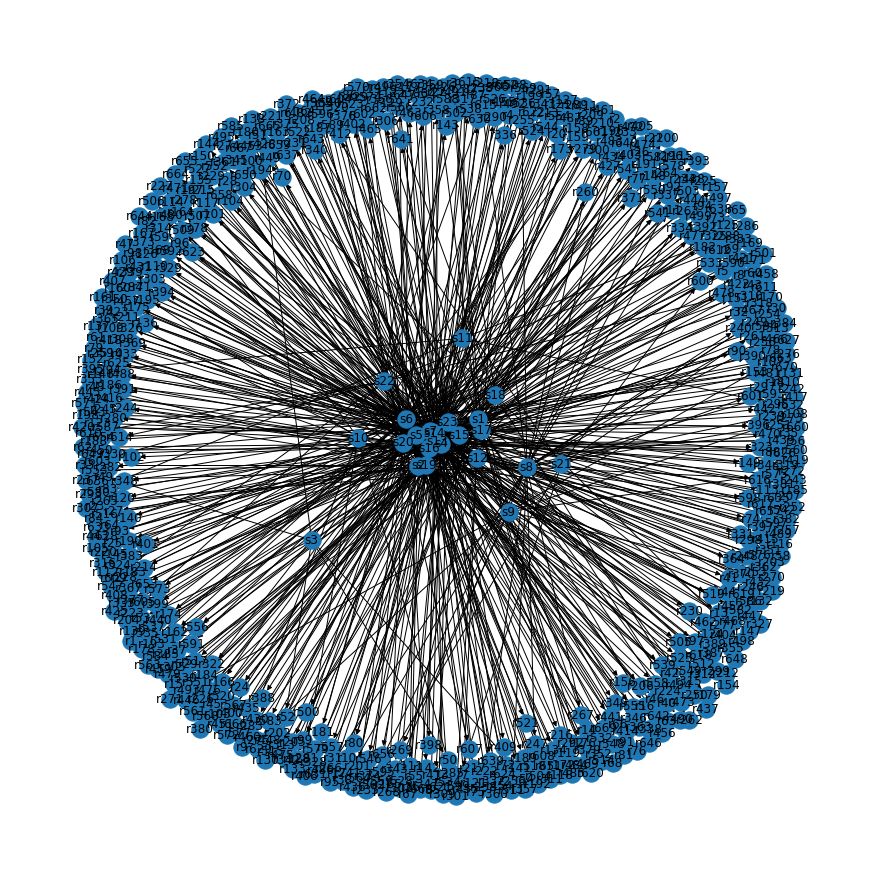

In [13]:
#print_nodes_graph
plt.rcParams["figure.figsize"] = (12,12)
pos = nx.spring_layout(graph)
nx.draw(graph, pos)
nx.draw_networkx_labels(graph, pos)
plt.show()

Подсчитаем сколько раз цитировались статьи

In [14]:
df = df.groupby(['References']).size().reset_index(name='Rank')
df

,References,Rank
0,A Comparative Study of Ordinary Cross-Validati...,1
1,A Customer Churn Prediction Model in Telecom I...,2
2,A Dynamic Model of Sponsored Search Advertising,1
3,A Farewell to the Bias-Variance Tradeoff? An O...,1
4,A Neural Network based Approach for Predicting...,1
...,...,...
607,research trends in customer churn prediction a...,1
608,scikit-learn: machine learning in python,1
609,testing for Linear and Nonlinear Granger Causa...,1
610,user behavior modelling approach for churn pre...,1


In [15]:
#sort_dataframe
sorted_df = df.sort_values(by='Rank')
print(sorted_df)

                                            References  Rank
0    A Comparative Study of Ordinary Cross-Validati...     1
400  Of quantiles and expectiles: consistent scorin...     1
401  On Pearl’s Hierarchy and the Foundations of Ca...     1
402               On boosting: Theory and applications     1
403  On pixel-wise explanations for non-linear clas...     1
..                                                 ...   ...
509  Stochastic relaxation, gibbs distributions, an...     3
195  Customer churn prediction using improved balan...     4
13   A comparison of machine learning techniques fo...     4
368  Measuring classifier performance: a coherent a...     4
505  Statistical comparisons of classifiers over mu...     4

[612 rows x 2 columns]


Исходя из полученных значений можно скать что, 4 последние статьи c номерами 195, 13, 368, 505 являются ключевыми, они упоминаются чаще всего